<a href="https://colab.research.google.com/github/MUNEEB68/Machine-learning-task/blob/main/house_prediction_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving housing_price_dataset.csv to housing_price_dataset.csv
Data from housing_price_dataset.csv:
   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065
Epoch: 0 and loss: 1.0270726680755615
Epoch: 10 and loss: 1.0100958347320557
Epoch: 20 and loss: 0.9929202198982239
Epoch: 30 and loss: 0.9807218909263611
Epoch: 40 and loss: 0.9655911922454834
Epoch: 50 and loss: 0.9538273215293884
Epoch: 60 and loss: 0.9380382895469666
Epoch: 70 and loss: 0.9267398715019226
Epoch: 80 and loss: 0.9138337969779968
Epoch: 90 and loss: 0.903496265411377
Epoch: 100 and loss: 0.8888566493988037
Epoch: 110 and loss: 0.874587

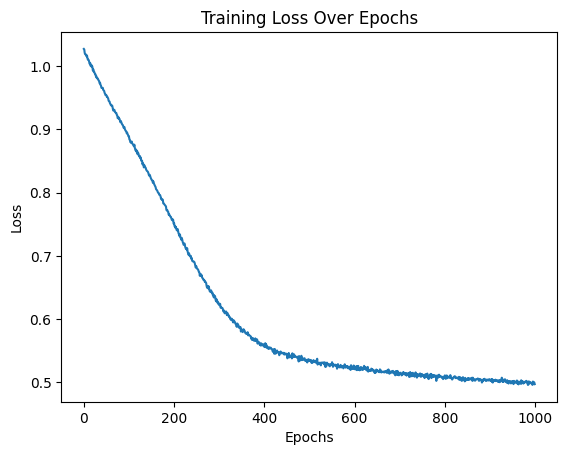

tensor(0.4956)
Predicted Price: 254271.1875


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class Model(nn.Module):
    def __init__(self, in_features=5, h1=50, h2=20, out_features=1):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(in_features, h1)
        self.dropout1 = nn.Dropout(0.3)
        self.layer2 = nn.Linear(h1, h2)
        self.dropout2 = nn.Dropout(0.3)
        self.output_layer = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.dropout1(x)
        x = F.relu(self.layer2(x))
        x = self.dropout2(x)
        x = self.output_layer(x)
        return x

def scale_data(X_train, X_test, y_train, y_test):
    # Standardize the features
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # Standardize the target variable
    scaler_y = StandardScaler()
    y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test = scaler_y.transform(y_test.reshape(-1, 1))

    return X_train, X_test, y_train, y_test, scaler_X, scaler_y

torch.manual_seed(500)
model = Model()

# Upload and read the CSV file
uploaded = files.upload()
for file_name in uploaded.keys():
    my_df = pd.read_csv(file_name)
    print(f"Data from {file_name}:")
    print(my_df.head())

# Replace categorical values
my_df['Neighborhood'] = my_df['Neighborhood'].replace("Rural", 0.0)
my_df['Neighborhood'] = my_df['Neighborhood'].replace("Suburb", 1.0)
my_df['Neighborhood'] = my_df['Neighborhood'].replace("Urban", 2.0)

# Prepare features and target variable
X = my_df.drop('Price', axis=1).values
y = my_df['Price'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=890)

# Scale the data
X_train, X_test, y_train, y_test, scaler_X, scaler_y = scale_data(X_train, X_test, y_train, y_test)

# Convert to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train).view(-1, 1)  # Reshape y_train to be of shape [N, 1]
y_test = torch.FloatTensor(y_test).view(-1, 1)    # Reshape y_test to be of shape [N, 1]

# Set the criterion and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Train our model
epochs = 1000
losses = []
for i in range(epochs):
    # Forward pass
    y_pred = model.forward(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Keep track of losses
    losses.append(loss.detach().numpy())

    # Print every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss.item()}')

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the loss over epochs
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss1 = criterion(y_eval, y_test) # Find the loss or error
  print(loss1)
new_set = [2126, 4, 1, 0, 1969]
new_set = scaler_X.transform([new_set])  # Scale the new set using the scaler_X
new_set = torch.FloatTensor(new_set)

with torch.no_grad():
    prediction = model.forward(new_set)
    prediction = scaler_y.inverse_transform(prediction.numpy())  # Inverse transform to get the original scale
    print(f'Predicted Price: {prediction[0][0]}')


In [ ]:
# Save the model
torch.save(model.state_dict(), 'model.pth')
print("Model saved to model.pth")

# Load the model (for future use)
loaded_model = Model()
loaded_model.load_state_dict(torch.load('model.pth'))
loaded_model.eval()  # Set the model to evaluation mode
print("Model loaded from model.pth")


Model saved to model.pth
Model loaded from model.pth
